In [1]:
import pandas as pd
import numpy as np
import re
import random

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from os import listdir, walk
from os.path import isfile, join
from pandas.plotting import parallel_coordinates
from tabulate import tabulate, SEPARATING_LINE



# Generate construction heuristics tables

In [3]:
df = pd.read_csv('analysis_fixed.csv')

In [4]:
df.columns

Index(['Instance_Name', 'Number_Of_Customers', 'Number_Of_Hotels',
       'Objective_Value', 'Sum_of_Trips', 'Penalties', 'Hotel_Fees',
       'Max_Trip_Length', 'Number_Of_Trips', 'Prize', 'Time', 'Trace',
       'initial_alphas', 'initial_betas', 'initial_gammas', 'initial_deltas',
       'initial_values'],
      dtype='object')

In [5]:
df.head()

,Instance_Name,Number_Of_Customers,Number_Of_Hotels,Objective_Value,Sum_of_Trips,Penalties,Hotel_Fees,Max_Trip_Length,Number_Of_Trips,Prize,Time,Trace,initial_alphas,initial_betas,initial_gammas,initial_deltas,initial_values
0,test,3,2,1070,970,0,100,600,2,2000,0.034727,[1280; 1280; 1280; 1280; 1070; 1280; 1070; 128...,[-0.24547345931146325; -0.5109565912092129; 0....,[-0.7523794990014323; -1.0922076290779947; -0....,[-0.4304718340704753; -1.442326346779648; -0.8...,[0.699666263767719; -0.17072185603700707; 1.36...,[1280; 1280; 1280; 1280; 1070; 1280; 1070; 128...
1,rc101_1,10,2,235,235,0,0,235,1,1000,0.100477,[100294; 100280; 100279; 100348; 100349; 10029...,[1.9520038520261216; 0.8613903899484527; 0.464...,[1.683436037954066; -2.598801186148169; -0.567...,[-2.072762588633407; -0.6941764470233805; 1.12...,[1.6850238927472199; 0.829876757193186; 1.0878...,[100309; 100319; 100296; 200526; 200529; 10031...
2,pr8_1,30,2,102066,2066,0,100000,1590,2,3000,1.236279,[102531; 102226; 102236; 102357; 102501; 10206...,[0.4383973323547128; 2.2600419890621284; 0.696...,[-1.3882424590245708; 0.6625197590132015; -1.2...,[-1.925096655860978; -1.5936707216617854; -0.1...,[0.3179117747425795; 1.5293812077456186; 1.392...,[102816; 102662; 102690; 102742; 306928; 10256...
3,eil51_1,50,1,411,350,61,0,350,1,716,4.158916,[100523; 100493; 100538; 411; 100482; 100452; ...,[0.3423639194243788; 1.4937632034571018; 0.162...,[-0.6787450699879253; 1.7890975690874602; 0.30...,[-1.2429669504425482; 0.2233674579363385; 0.96...,[0.800037972226614; 0.4088608790579795; 1.4627...,[100758; 100778; 201152; 540; 200866; 100755; ...
4,berlin51_1,51,10,1112251,12251,0,1100000,1141,12,5100,8.316160,[1413850; 1312832; 1412434; 1312444; 1412743; ...,[0.10838493621518996; 0.4445572517340367; 0.71...,[-0.04472935216737889; 0.028027570268372104; -...,[0.07925097306463547; -3.0745944604320887; -1....,[0.9929954904848526; 2.520462895082327; 0.3581...,[1514871; 1413830; 1514942; 1414540; 1414158; ...


In [6]:
def trace_to_list(trace, parse_fun = int):
    points = trace.split(';')
    int_points = []

    int_points.append(parse_fun(points[0][1:]))
    for i in range(1,len(points) - 1):
        int_points.append(parse_fun(points[i]))
    int_points.append(parse_fun(points[len(points) - 1][:-1]))
    
    return int_points
    

In [7]:
instances = list(df['Instance_Name'].unique())

In [8]:
bests = []
times = []
means = []
sds = []
avg_initial_values = []
avg_alphas = []
avg_betas = []
avg_gammas = []
avg_deltas = []

for instance in instances:
    val = df['Instance_Name'] == instance
    df_instance = df[val]
    
    
    v = df_instance['Objective_Value']
    t = df_instance['Time']
    
    best_rows_bools = df_instance['Objective_Value'] == min(v)
    
    best_rows = df_instance[best_rows_bools]
    n_rows, n_cols = best_rows.shape
    
    index = 0
    if n_rows > 1:
        index = random.randint(0,n_rows-1)
    
    best_row = best_rows.iloc[index,:]
    
    bests.append(best_row['Objective_Value'])
    times.append(best_row['Time'])
    
    obj_values = best_row['Trace']
    
    obj_values = trace_to_list(obj_values)
    means.append(np.mean(obj_values))
    sds.append(np.std(obj_values))
    
    initial_values = trace_to_list(best_row['initial_values'])
    alpha_values = trace_to_list(best_row['initial_alphas'], float)
    beta_values = trace_to_list(best_row['initial_betas'], float)
    gamma_values = trace_to_list(best_row['initial_gammas'], float)
    delta_values = trace_to_list(best_row['initial_deltas'], float)
    
    avg_initial_values.append(np.mean(initial_values))
    avg_alphas.append(np.mean(alpha_values))
    avg_betas.append(np.mean(beta_values))
    avg_gammas.append(np.mean(gamma_values))
    avg_deltas.append(np.mean(delta_values))
    
    
    
    #best_alphas.append(best_row['alpha'])
    #best_betas.append(best_row['beta'])
    #best_gammas.append(best_row['gamma'])
    #best_deltas.append(best_row['delta'])    
    
    #avg_times.append(np.mean(t))
    #sds_times.append(np.std(t))
    

In [10]:
df_2 = pd.DataFrame()
df_2['Instance_Name'] = instances
df_2['Best-Objective-Value'] = bests
df_2['Avg-Objective-Value'] = means
df_2['Sds-Objective-Value'] = sds
df_2['Avg-Initial-Value'] = avg_initial_values
df_2['Avg_alpha'] = avg_alphas
df_2['Avg_beta'] = avg_betas
df_2['Avg_gamma'] = avg_gammas
df_2['Avg_delta'] = avg_deltas
df_2['Random_k'] = [6] * len(avg_betas)
df_2['Time'] = times


In [11]:
df_2

,Instance_Name,Best-Objective-Value,Avg-Objective-Value,Sds-Objective-Value,Avg-Initial-Value,Avg_alpha,Avg_beta,Avg_gamma,Avg_delta,Random_k,Time
0,test,1070,1238.0,84.000000,1238.0,0.279070,-0.800054,-0.570533,0.662130,6,0.034727
1,rc101_1,235,90287.9,30017.653744,120356.2,0.486772,-0.542848,-0.810742,0.747677,6,0.100477
2,pr8_1,102066,102344.6,152.233505,143565.5,0.643321,-0.603324,-1.093079,0.315827,6,1.236279
3,eil51_1,411,90469.1,30019.383633,110733.2,1.546424,0.073578,-0.334206,0.987653,6,4.158916
4,berlin51_1,1112251,1322583.9,94781.110765,1434304.4,0.871488,-0.131093,-0.791058,0.839440,6,8.316160
5,berlin52_2,8184,9398.2,664.573216,10888.1,1.188106,-0.311911,-0.425348,0.397022,6,2.893725
6,berlin52_3,6153,7000.0,887.607120,8738.1,1.033736,-0.275194,-0.376306,0.548161,6,3.190601
7,rc101_2,801856,851921.3,50021.513532,872069.7,0.844250,-0.192801,-0.653389,1.093365,6,7.244146
8,rc101_3,1161,1607.5,456.135999,2171.7,1.050748,-0.386508,-0.087438,0.383657,6,13.328871
9,pr8_2,307274,397744.8,30157.570893,408571.7,0.800135,-0.038671,-0.710088,0.831501,6,39.868913


In [12]:
table_0 = df_2[['Instance_Name','Best-Objective-Value','Avg-Objective-Value','Sds-Objective-Value','Avg-Initial-Value']]
table_1 = df_2[['Instance_Name','Avg_alpha','Avg_beta','Avg_gamma','Avg_delta','Random_k', 'Time']]

In [13]:
print(tabulate(table_0, headers=table_0.columns, tablefmt='latex'))

\begin{tabular}{rlrrrr}
\hline
    & Instance\_Name   &   Best-Objective-Value &   Avg-Objective-Value &   Sds-Objective-Value &   Avg-Initial-Value \\
\hline
  0 & test            &                   1070 &        1238           &                84     &       1238          \\
  1 & rc101\_1         &                    235 &       90287.9         &             30017.7   &     120356          \\
  2 & pr8\_1           &                 102066 &      102345           &               152.234 &     143566          \\
  3 & eil51\_1         &                    411 &       90469.1         &             30019.4   &     110733          \\
  4 & berlin51\_1      &                1112251 &           1.32258e+06 &             94781.1   &          1.4343e+06 \\
  5 & berlin52\_2      &                   8184 &        9398.2         &               664.573 &      10888.1        \\
  6 & berlin52\_3      &                   6153 &        7000           &               887.607 &       8738.1      

In [14]:
print(tabulate(table_1, headers = table_1.columns, tablefmt='latex'))

\begin{tabular}{rlrrrrrr}
\hline
    & Instance\_Name   &   Avg\_alpha &   Avg\_beta &   Avg\_gamma &   Avg\_delta &   Random\_k &        Time \\
\hline
  0 & test            &    0.27907  & -0.800054  &  -0.570533  &   0.66213   &          6 &   0.0347269 \\
  1 & rc101\_1         &    0.486772 & -0.542848  &  -0.810742  &   0.747677  &          6 &   0.100477  \\
  2 & pr8\_1           &    0.643321 & -0.603324  &  -1.09308   &   0.315827  &          6 &   1.23628   \\
  3 & eil51\_1         &    1.54642  &  0.0735783 &  -0.334206  &   0.987653  &          6 &   4.15892   \\
  4 & berlin51\_1      &    0.871488 & -0.131093  &  -0.791058  &   0.83944   &          6 &   8.31616   \\
  5 & berlin52\_2      &    1.18811  & -0.311911  &  -0.425348  &   0.397022  &          6 &   2.89373   \\
  6 & berlin52\_3      &    1.03374  & -0.275194  &  -0.376306  &   0.548161  &          6 &   3.1906    \\
  7 & rc101\_2         &    0.84425  & -0.192801  &  -0.653389  &   1.09337   &          6 &

In [4]:
df

,Instance_Name,Number_Of_Customers,Number_Of_Hotels,Objective_Value,Sum_of_Trips,Penalties,Hotel_Fees,Max_Trip_Length,Number_Of_Trips,Prize,Time,Trace,Trip_Lengths,Percentate-of-collected-prizes,uses-delta-evaluation,procedure-type,alpha,beta,gamma,delta
0,test,3,2,1070,970,0,100,600,2,2000,0.001734,[1070],[370; 600],1.000000,True,backtracking,1,0.20,0.20,0.2
1,rc101_1,10,2,235,235,0,0,235,1,1000,0.030743,[235],[235],1.000000,True,insertion-heuristic-sum-of-trips,1,0.00,0.00,0.0
2,pr8_1,30,2,102304,2304,0,100000,1925,2,3000,0.426633,[102304],[1925; 379],1.000000,True,pure-greedy,1,0.00,0.00,0.0
3,eil51_1,50,1,515,336,179,0,336,1,598,1.169480,[515],[336],0.769627,True,pure-greedy,2,-0.25,0.05,0.5
4,berlin51_1,51,10,910253,10253,0,900000,1146,10,5100,4.586053,[910253],[983; 1099; 1097; 1146; 976; 1095; 904; 1130; ...,1.000000,True,pure-greedy,1,0.00,0.00,0.0
5,berlin52_2,51,10,8567,7145,360,1062,1318,6,1416,3.286753,[8567],[1317; 1318; 1313; 978; 1098; 1121],0.797297,True,pure-greedy,1,0.00,0.00,0.0
6,berlin52_3,51,10,6704,5181,879,644,1148,5,897,4.223090,[6704],[990; 1101; 1099; 1148; 843],0.505068,True,pure-greedy,1,0.00,0.00,0.0
7,rc101_2,100,6,701843,1843,0,700000,235,8,10000,16.476856,[701843],[231; 224; 235; 234; 223; 234; 232; 230],1.000000,True,backtracking,1,-0.50,-0.50,0.5
8,rc101_3,100,6,1547,633,692,222,227,3,2210,11.848242,[1547],[220; 227; 186],0.761544,True,backtracking,1,-0.40,-0.10,1.0
9,pr8_2,144,6,307818,7818,0,300000,1999,4,14400,38.472840,[307818],[1999; 1969; 1974; 1876],1.000000,True,insertion-diverse-hotels,1,0.00,0.00,0.0


In [5]:
with_delta = df['uses-delta-evaluation'] == True
without_delta = df['uses-delta-evaluation'] == False

In [6]:
times_delta = (df[with_delta])['Time']
times_no_delta = (df[without_delta])['Time']

In [10]:
instances = (df[with_delta])['Instance_Name']

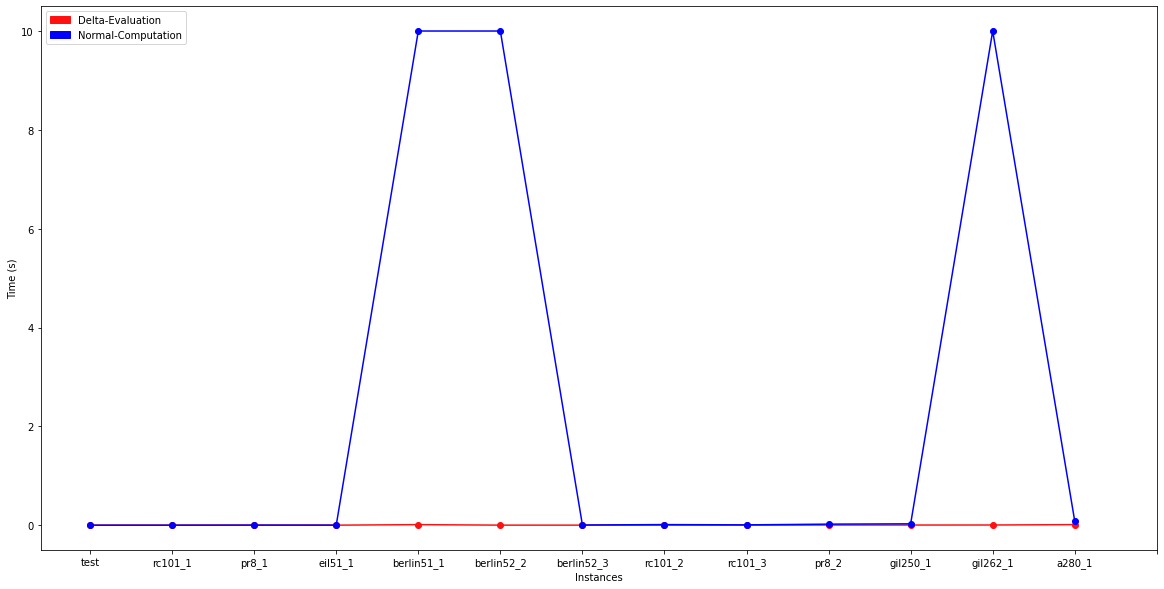

In [24]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(instances, times_delta, '-o', color='#ff1111')
ax.plot(instances, times_no_delta, '-o', color='#0000ff')

ax.set_xlabel("Instances")
ax.set_ylabel("Time (s)")
patches = [mpatches.Patch(color='#ff1111', label='Delta-Evaluation'),
           mpatches.Patch(color='#0000ff', label='Normal-Computation')]
           

ax.legend(handles=patches, loc='upper left')
plt.xticks(list(range(len(instances) + 1)))
plt.savefig('construction_delta_no_delta.png', dpi=300)
plt.show()